Pixel-to-Wavelength Mapping:
Pixel 1: 273.984 nm
Pixel 2: 274.127 nm
Pixel 3: 274.270 nm
Pixel 4: 274.413 nm
Pixel 5: 274.556 nm
Pixel 6: 274.699 nm
Pixel 7: 274.842 nm
Pixel 8: 274.985 nm
Pixel 9: 275.127 nm
Pixel 10: 275.270 nm
Pixel 11: 275.413 nm
Pixel 12: 275.556 nm
Pixel 13: 275.699 nm
Pixel 14: 275.842 nm
Pixel 15: 275.985 nm
Pixel 16: 276.128 nm
Pixel 17: 276.271 nm
Pixel 18: 276.413 nm
Pixel 19: 276.556 nm
Pixel 20: 276.699 nm
Pixel 21: 276.842 nm
Pixel 22: 276.985 nm
Pixel 23: 277.127 nm
Pixel 24: 277.270 nm
Pixel 25: 277.413 nm
Pixel 26: 277.556 nm
Pixel 27: 277.698 nm
Pixel 28: 277.841 nm
Pixel 29: 277.984 nm
Pixel 30: 278.127 nm
Pixel 31: 278.269 nm
Pixel 32: 278.412 nm
Pixel 33: 278.555 nm
Pixel 34: 278.697 nm
Pixel 35: 278.840 nm
Pixel 36: 278.983 nm
Pixel 37: 279.125 nm
Pixel 38: 279.268 nm
Pixel 39: 279.411 nm
Pixel 40: 279.553 nm
Pixel 41: 279.696 nm
Pixel 42: 279.838 nm
Pixel 43: 279.981 nm
Pixel 44: 280.124 nm
Pixel 45: 280.266 nm
Pixel 46: 280.409 nm
Pixel 47: 280.

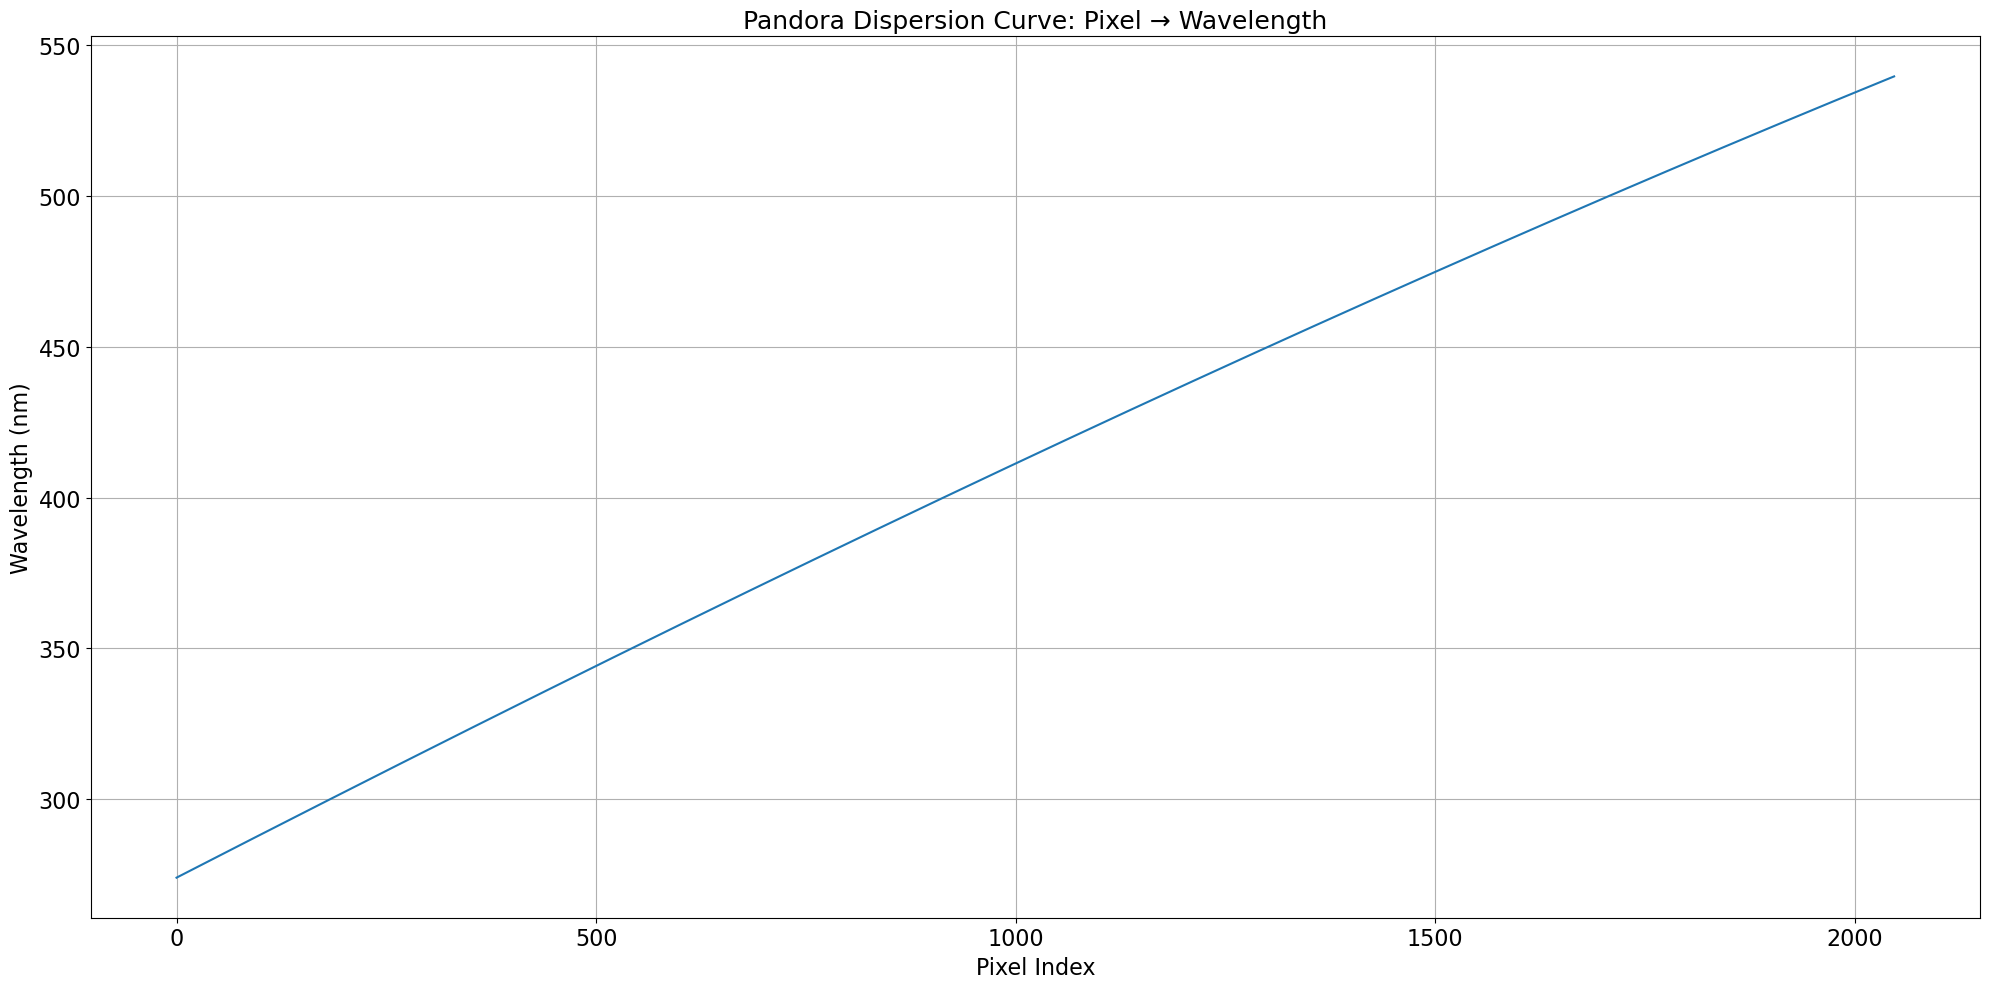

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import re

np.set_printoptions(threshold = np.inf)

# Step 1: Load calibration file for dispersion and loref ===
with open('/Users/muntasirmahmud/Library/CloudStorage/OneDrive-UMBC/4. SciGlob/Panndora_456/Lab_pandora/25_Apr 25_pandora157/Pandora157s1_CF_session8.txt', 'r') as f:
    lines = f.readlines()

dispersion_coeffs = []
loref = None

for line in lines:
    if "Dispersion polynomial" in line:
        dispersion_coeffs = list(map(float, re.findall(r'[-+]?\d*\.\d+e[+-]?\d+', line)))
    if "Reference wavelength for wavelength change retrieval" in line:
        loref = float(re.findall(r'[-+]?\d*\.\d+', line)[0])


###  Or,

# dispersion_coeffs = [
#     9.267164e-04, -1.791262e-03, -1.054729e-02, 1.172852e-02,
#    -1.102532e-01, -2.544954e+00, 7.720954e+01, 4.142817e+02
# ] 

# Step 2: Generate scaled pixels according to the manual
npix = 2048  # Number of pixels
pix = np.arange(1, npix + 1)  # Start from 1, not 0
pixs = 3.46 * ((pix / npix) - 0.5)  # Scaled pixels

# Step 3: Evaluate the polynomial
lo = np.polyval(dispersion_coeffs, pixs)  # Final wavelengths


# Step 4: Check output
print("Pixel-to-Wavelength Mapping:")
for i in range(2048):
    print(f"Pixel {i+1}: {lo[i]:.3f} nm")

# plot
plt.figure(figsize=(20, 10))
plt.plot(np.arange(npix), lo)
plt.xlabel("Pixel Index", fontsize=16)
plt.ylabel("Wavelength (nm)", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("Pandora Dispersion Curve: Pixel → Wavelength", fontsize=18)
plt.grid(True)
plt.tight_layout()
plt.show()
